# Estación San Chinarro

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../../data/df_57.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,45.709677
2013-02-01,35.709677
2013-03-01,28.903226
2013-04-01,23.387097
2013-05-01,22.580645


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

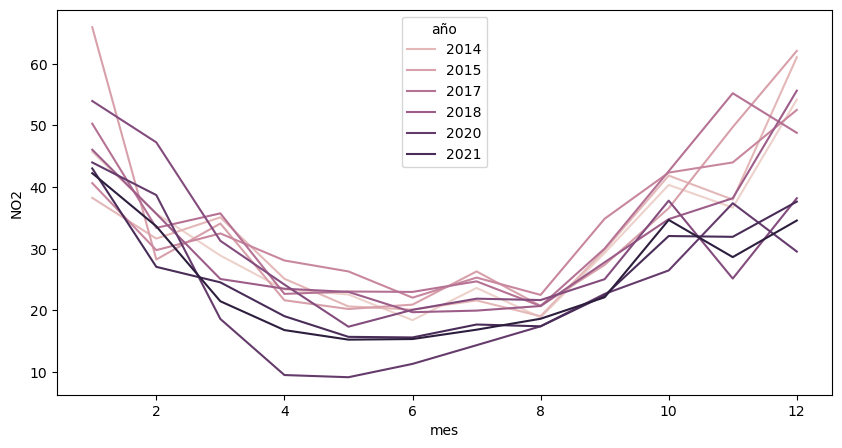

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

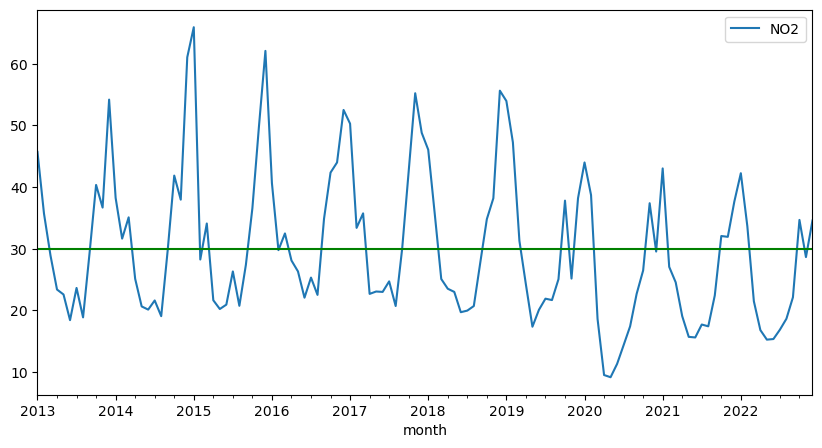

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

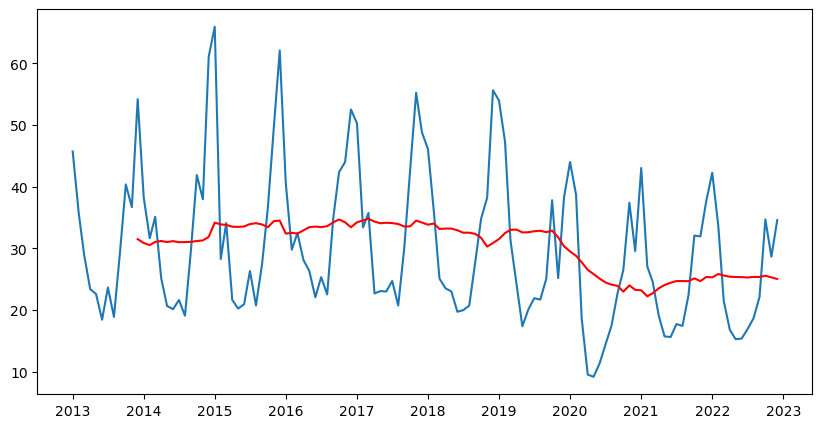

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

In [11]:
df.head()

,NO2
month,
2013-01-01,45.709677
2013-02-01,35.709677
2013-03-01,28.903226
2013-04-01,23.387097
2013-05-01,22.580645


In [12]:
df2.head()

,NO2,año,mes
month,,,
2013-01-01,45.709677,2013,1
2013-02-01,35.709677,2013,2
2013-03-01,28.903226,2013,3
2013-04-01,23.387097,2013,4
2013-05-01,22.580645,2013,5


In [13]:
df3 = df.copy()

In [14]:
df3["year"] = df3.index.year
df3["month"] = df2.index.month
df3.head()

,NO2,year,month
month,,,
2013-01-01,45.709677,2013,1
2013-02-01,35.709677,2013,2
2013-03-01,28.903226,2013,3
2013-04-01,23.387097,2013,4
2013-05-01,22.580645,2013,5


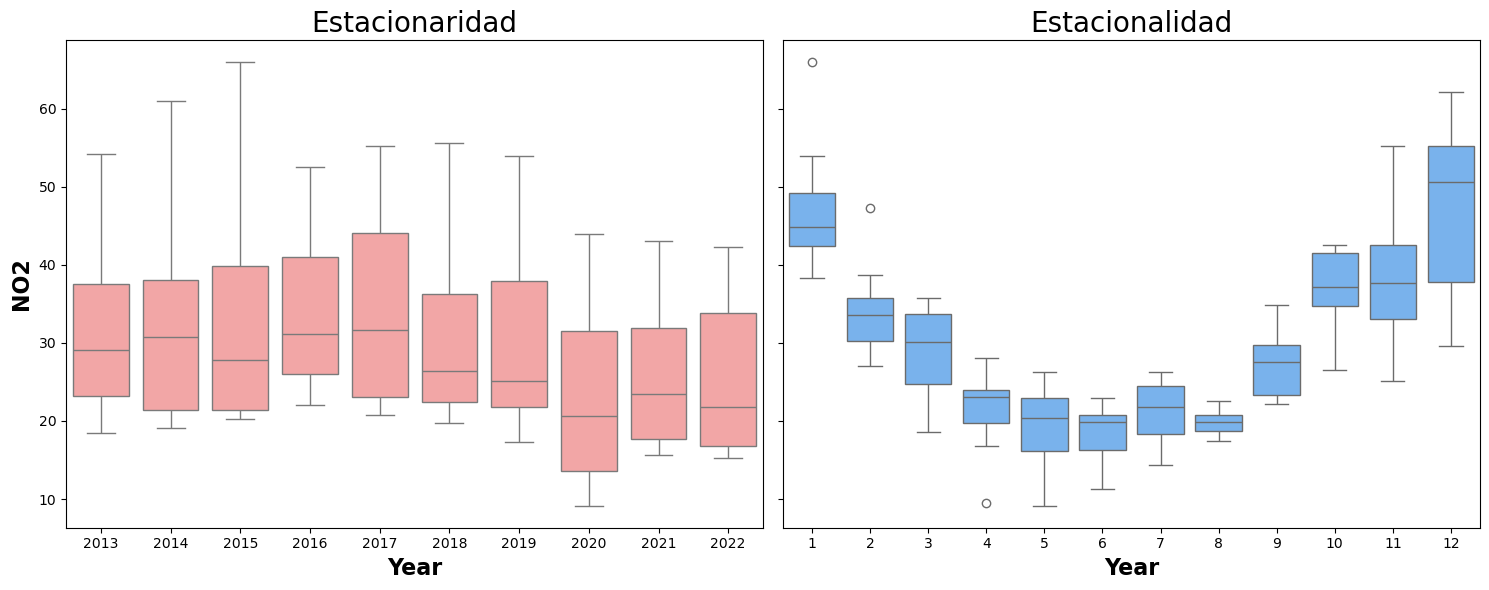

In [15]:
# Nos creamos una lista con las columnas de tiempo
tiempo = df3.columns.drop("NO2")

# Iniciamos los subplots
fig, ax = plt.subplots(nrows=1, ncols=len(tiempo), figsize=(15, 6), sharey=True)

# Nombres personalizados para los títulos
nombres = ["Estacionaridad", "Estacionalidad"]

# Colores bonitos para los boxplots
colores = ["#FF9999", "#66B2FF"]  # Puedes modificar estos códigos de colores

# Hacemos un loop para crear los boxplots para cada año
for i, col in enumerate(tiempo):
    sns.boxplot(data=df3, x=col, y="NO2", ax=ax[i], palette=[colores[i]])
    ax[i].set_title(nombres[i], fontsize=20, loc='center')
    ax[i].set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
    ax[i].set_ylabel('NO2', fontsize=16, fontdict=dict(weight='bold'))

plt.tight_layout()
plt.show()

No hay estacionaridad.

El de estacionalidad estudia todos los eneros, febreros,... de mis años muestra.

La aplicación de la estacionalidad (por ejemplo, a través de un modelo SARIMA con un parámetro estacional) sigue siendo relevante para comprender los patrones recurrentes en tus datos a lo largo del tiempo. Sin embargo, los desplazamientos o irregularidades en la mediana podrían indicar:

Cambios en los patrones estacionales: Las variaciones en la mediana podrían señalar cambios en los patrones estacionales a lo largo del tiempo. Esto puede requerir una exploración adicional para comprender si estas variaciones son anómalas o representan cambios genuinos en la estacionalidad.

Anomalías o eventos atípicos: La presencia de valores atípicos o eventos inusuales en los datos estacionales puede afectar la representación visual de la estacionalidad. Estos eventos pueden causar que la mediana no esté centrada en el boxplot.

En resumen, aunque la mediana desplazada en un boxplot puede indicar cierta variabilidad o cambios en los patrones estacionales, aún puedes aplicar el análisis estacional para comprender los ciclos recurrentes en tus datos. Sin embargo, es importante considerar las posibles anomalías o cambios en los datos que podrían estar afectando la representación visual de la estacionalidad.

### Test de Fuller

In [16]:
res = adfuller(df["NO2"])
res

(-0.5080347984780994,
 0.8904389992808701,
 11,
 108,
 {'1%': -3.4924012594942333,
  '5%': -2.8886968193364835,
  '10%': -2.5812552709190673},
 698.1568222419515)

In [17]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -0.5080347984780994
p-value 0.8904389992808701
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [18]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 1.0
1 mes Lag, 0.7113169433036003
2 mes Lag, 0.40575193476337834
3 mes Lag, 0.06775532188457142
4 mes Lag, -0.2725028086570512
5 mes Lag, -0.4743321035578722
6 mes Lag, -0.5261700401356297
7 mes Lag, -0.4903681466060976
8 mes Lag, -0.28410235164929315
9 mes Lag, 0.05771898519332937
10 mes Lag, 0.3946929022604274
11 mes Lag, 0.6734216303959791
12 mes Lag, 0.8245836743419162
13 mes Lag, 0.6865056599705084
14 mes Lag, 0.3851210146413759
15 mes Lag, 0.06269155977745158
16 mes Lag, -0.31046133361644784
17 mes Lag, -0.5161110609912336
18 mes Lag, -0.5686167320064541
19 mes Lag, -0.5091752385875963
20 mes Lag, -0.29677404640183075
21 mes Lag, 0.0389823833340677
22 mes Lag, 0.3273075628951667
23 mes Lag, 0.6538926017144084
24 mes Lag, 0.8072262518994583
25 mes Lag, 0.6543813682155944
26 mes Lag, 0.3747488319091922
27 mes Lag, 0.022232541612709846
28 mes Lag, -0.33819149310173996
29 mes Lag, -0.5579397888508688
30 mes Lag, -0.6283351511481086
31 mes Lag, -0.5643655353623781
32 mes La

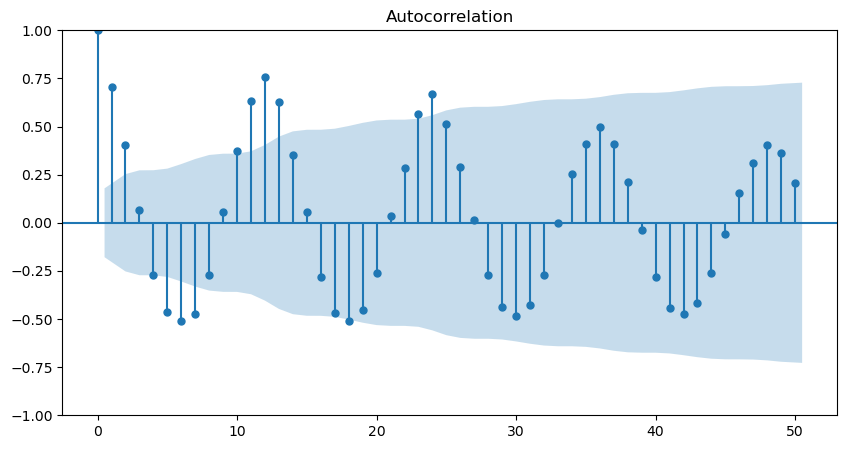

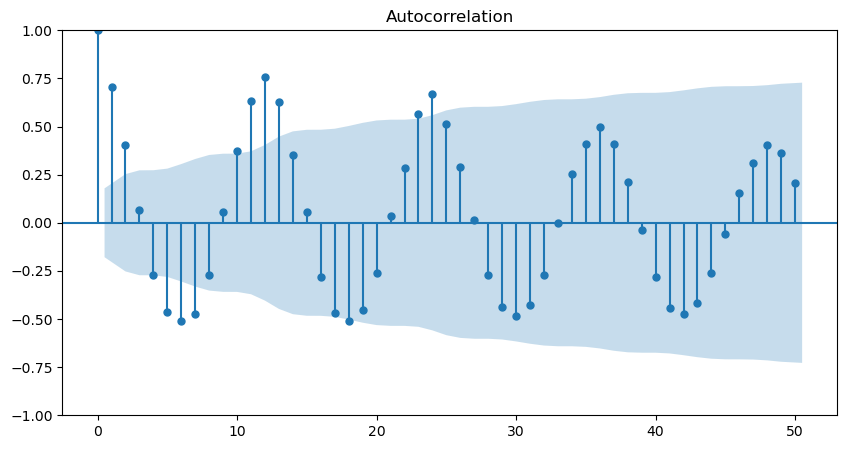

In [19]:
plot_acf(df, lags = 50)

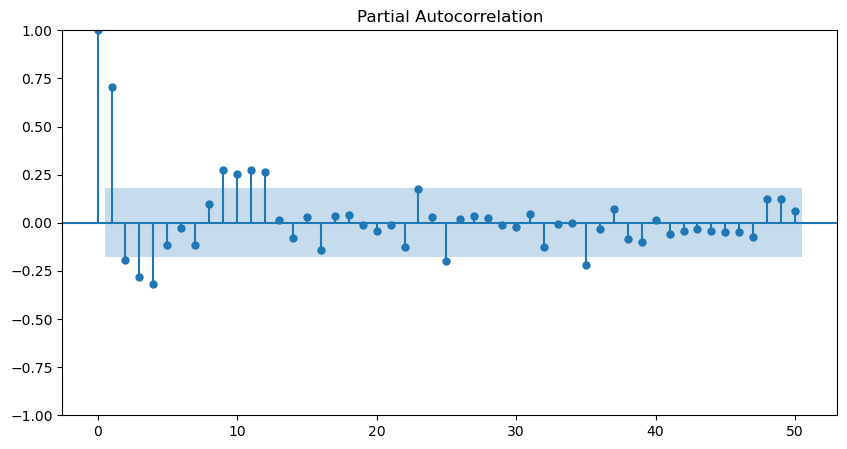

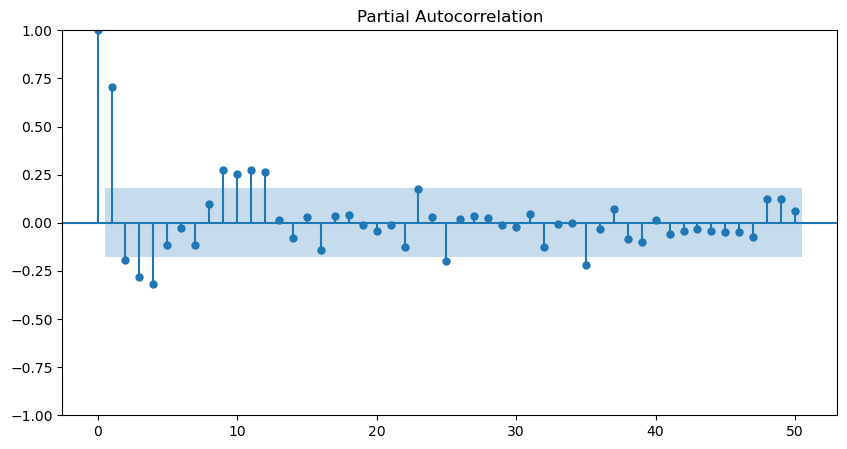

In [20]:
plot_pacf(df, lags = 50)

In [21]:
df.head()

,NO2
month,
2013-01-01,45.709677
2013-02-01,35.709677
2013-03-01,28.903226
2013-04-01,23.387097
2013-05-01,22.580645


In [22]:
df.shape

(120, 1)

In [23]:
df.isnull().sum()

NO2    0
dtype: int64

### SARIMA

In [24]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [25]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [26]:
%%time
rmse = []
order = []
for p, d, q in tqdm(parameters):
    try:
        modelo=ARIMA(y_train, order=(p, d, q)).fit()
        pred = modelo.predict(start=len(y_train), end=len(df) -1)
        error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
        rmse.append(error)
        order.append((p,d, q))
    except: 
        continue

  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 62%|██████▎   | 15/24 [00:00<00:00, 25.37it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packag

CPU times: total: 562 ms
Wall time: 1.18 s


In [27]:
# veamos los resultados de todos los modelos
results = pd.DataFrame({"RMSE": rmse, "order": order})
results.sort_values(by="RMSE", inplace=True)
results.head()

,RMSE,order
8,9.967957,"(1, 1, 2)"
14,12.008135,"(2, 1, 2)"
20,14.922869,"(3, 1, 2)"
9,15.742236,"(1, 2, 0)"
19,16.009801,"(3, 1, 1)"


In [28]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(1, 1, 2),  # modelo arima
               seasonal_order=(1, 1, 2, 12) # modelo sarima, estacionalidad es el último valor
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Error mae:  4.649106552258087
CPU times: total: 62.5 ms
Wall time: 290 ms


,real,pred,error
2020-07-01,14.354839,18.811898,4.457060
2020-08-01,17.419355,20.229386,2.810031
2020-09-01,22.677419,27.150507,4.473088
2020-10-01,26.483871,37.349478,10.865607
2020-11-01,37.387097,35.290036,-2.097061
2020-12-01,29.548387,48.043882,18.495495
2021-01-01,43.032258,48.761040,5.728782
2021-02-01,27.064516,41.044757,13.980240
2021-03-01,24.548387,26.056520,1.508133
2021-04-01,19.064516,18.261176,-0.803340


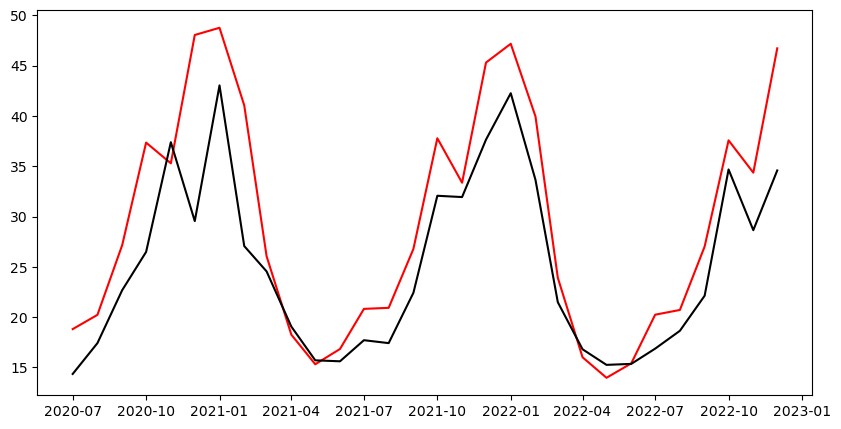

In [29]:
plt.plot(res["pred"], c = "r")
plt.plot(res["real"], c = "black");

In [30]:
pred["real_test"] = y_test

In [31]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 9))
pred_año

,predicted_mean
2023-01-01,47.991157
2023-02-01,40.514662
2023-03-01,25.017080
2023-04-01,17.171986
2023-05-01,14.667478
2023-06-01,16.142536
2023-07-01,20.543153
2023-08-01,20.824516
2023-09-01,26.896597
2023-10-01,37.680087


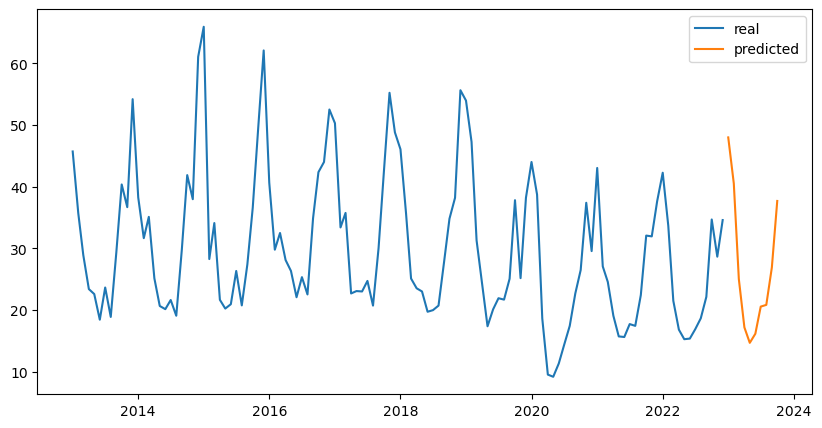

In [32]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [33]:
pred_año

,predicted_mean
2023-01-01,47.991157
2023-02-01,40.514662
2023-03-01,25.017080
2023-04-01,17.171986
2023-05-01,14.667478
2023-06-01,16.142536
2023-07-01,20.543153
2023-08-01,20.824516
2023-09-01,26.896597
2023-10-01,37.680087


## Datos reales 2023

In [34]:
df23 = pd.read_csv("../../data/emisiones23.csv")

In [35]:
df23.head()

,Unnamed: 0,ESTACION,ANO,MES,NO2
0,0,4,2023,1,32.516129
1,1,4,2023,2,36.741935
2,2,4,2023,3,27.806452
3,3,4,2023,4,22.838710
4,4,4,2023,5,16.612903


### Elijo la estación correspondiente

In [36]:
real = df23[df23["ESTACION"] == 57]
real

,Unnamed: 0,ESTACION,ANO,MES,NO2
198,198,57,2023,1,31.451613
199,199,57,2023,2,30.451613
200,200,57,2023,3,22.903226
201,201,57,2023,4,17.516129
202,202,57,2023,5,11.774194
203,203,57,2023,6,15.258065
204,204,57,2023,7,15.903226
205,205,57,2023,8,14.193548
206,206,57,2023,9,24.612903
207,207,57,2023,10,27.387097


In [37]:
import sys
sys.path.append('../../src')

from clean_support import NO2_clean, estacion_timeseries

In [38]:
estacion_timeseries(real)

,Unnamed: 0,NO2
month,,
2023-01-01,198,31.451613
2023-02-01,199,30.451613
2023-03-01,200,22.903226
2023-04-01,201,17.516129
2023-05-01,202,11.774194
2023-06-01,203,15.258065
2023-07-01,204,15.903226
2023-08-01,205,14.193548
2023-09-01,206,24.612903


In [39]:
real.drop("Unnamed: 0", axis=1, inplace=True)

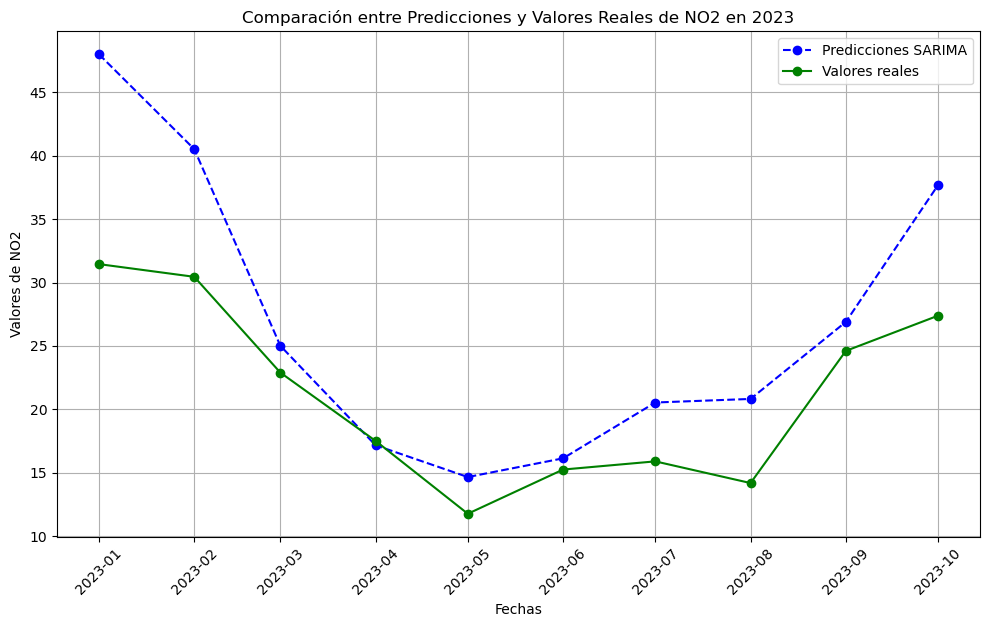

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de tener las fechas como índices y las columnas 'predicted_mean' y 'NO2' disponibles

# Convertir las columnas de fechas a objetos datetime si es necesario
pred_año.index = pd.to_datetime(pred_año.index)
real.index = pd.to_datetime(real.index)

# Filtrar los datos de 2023 para enero a octubre
predicciones_2023 = pred_año['predicted_mean']['2023-01':'2023-10']
valores_reales_2023 = real['NO2']['2023-01':'2023-10']

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(predicciones_2023.index, predicciones_2023, color='blue', label='Predicciones SARIMA', linestyle='--', marker='o')
plt.plot(valores_reales_2023.index, valores_reales_2023, color='green', label='Valores reales', linestyle='-', marker='o')

# Añadir etiquetas, título y leyenda
plt.xlabel('Fechas')
plt.ylabel('Valores de NO2')
plt.title('Comparación entre Predicciones y Valores Reales de NO2 en 2023')
plt.legend()

# Mejorar el diseño
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las fechas para mayor legibilidad

# Mostrar la gráfica
plt.show()

In [41]:
pred_año["predicted_mean"]
real["NO2"]

month
2023-01-01    31.451613
2023-02-01    30.451613
2023-03-01    22.903226
2023-04-01    17.516129
2023-05-01    11.774194
2023-06-01    15.258065
2023-07-01    15.903226
2023-08-01    14.193548
2023-09-01    24.612903
2023-10-01    27.387097
Freq: MS, Name: NO2, dtype: float64

### Estimación cierre 2023

In [42]:
pred_año_total = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 11))
pred_año_total

,predicted_mean
2023-01-01,47.991157
2023-02-01,40.514662
2023-03-01,25.017080
2023-04-01,17.171986
2023-05-01,14.667478
2023-06-01,16.142536
2023-07-01,20.543153
2023-08-01,20.824516
2023-09-01,26.896597
2023-10-01,37.680087


In [43]:
# Obtener las dos últimas filas de pred_año_total
ultimas_filas_pred_año = pred_año_total.tail(2)

# Renombrar la columna 'predicted_mean' como 'NO2' en las dos últimas filas
ultimas_filas_pred_año = ultimas_filas_pred_año.rename(columns={'predicted_mean': 'NO2'})

# Añadir las dos últimas filas al final de los datos reales
frames = [real, ultimas_filas_pred_año]
df_extendido = pd.concat(frames)

# Verificar el DataFrame extendido
df_extendido

,NO2
2023-01-01,31.451613
2023-02-01,30.451613
2023-03-01,22.903226
2023-04-01,17.516129
2023-05-01,11.774194
2023-06-01,15.258065
2023-07-01,15.903226
2023-08-01,14.193548
2023-09-01,24.612903
2023-10-01,27.387097


In [44]:
df_predict23 = df_extendido.mean()
df_predict23

NO2    24.273928
dtype: float64

In [45]:
dff = df_predict23.to_frame()
dff = dff.rename(columns={0: "San Chinarro"})
dff

,San Chinarro
NO2,24.273928


In [46]:
dff.to_csv('../../clean_visuals/predicts23/57_San_Chinarro.csv', index=True)